In [1]:
from zget_data import get_responses, get_qinfo, get_questions, page_map
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fnames, survey_response, time_response = get_responses()

# Time Analysis

,index,1,2,3,4,5,6,7,csquest,spasssurvey,demo,total (mins)
39,89.426,12.157,3.524,17.224,3.157,29.672,2.624,55.173,585.611,95.729,110.227,16.742067
40,126.866,9.610,2.327,23.528,3.810,49.643,1.677,76.194,785.013,71.931,211.413,22.700200
41,58.767,7.980,2.818,14.380,2.614,23.314,2.564,55.497,601.284,105.082,155.252,17.159200
42,307.679,10.993,3.432,41.915,3.279,25.160,3.046,84.044,1020.308,88.211,220.791,30.147633
43,92.634,9.185,2.966,24.134,2.651,24.682,1.616,51.131,621.473,93.356,147.238,17.851100


26.359637878787876

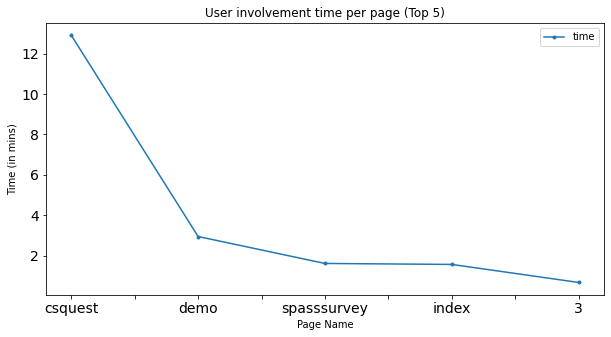

In [3]:
page_time_df = pd.DataFrame(time_response)
page_time_df = page_time_df.sort_index(axis=1, key=lambda x: x.astype(int))
page_time_df = page_time_df.rename(page_map, axis=1)
page_time_df['total (mins)'] = page_time_df.sum(axis=1)/60
display(page_time_df.tail())
display(page_time_df['total (mins)'].mean())


# top 5 pages with higher time
top5 = pd.DataFrame(columns=['page', 'time'])
for i, data in page_time_df.median().div(60).sort_values(ascending=False).head(5).items():
    top5 = pd.concat([top5, pd.DataFrame([[i, data]], columns=top5.columns)])

_ = top5.plot(x='page', y='time', figsize=(10, 5), xlabel="Page Name", ylabel="Time (in mins)", title="User involvement time per page (Top 5)", fontsize=14, style=".-")

# Survey Response Analysis

In [4]:
questions = get_questions()
survey_response_df = pd.DataFrame(survey_response)
display(survey_response_df.head(1))

,8,9,0,10,null
0,"{'Sto': {'12-1': '2', '5-1': '6', '5-2': '7', ...","{'1-1': 'JPawesome@8yrs', '2-1': 'Strong', '3-...","{'1-1': ['Assignments and homework', 'Games', ...","{'1-1': 'Boy', '2-1': '11 years old', '3-1': '...",NaN


In [5]:
# Function to filter data based on page number
def test(d):
    temp = {}
    for k, v in d.items():
        if (k != 'design_order'):
            for k2, v2 in v.items():
                q = f'{k2}_{k}'
                temp[q] = v2
    return temp

## CSQuest

In [6]:
csq_pid = '8'
design_order_series = survey_response_df[csq_pid].apply(lambda x: x.get('design_order'))
csquest_response_df = survey_response_df[csq_pid].apply(test)
csquest_questions = get_questions().get(csq_pid)

csquest_response_df = pd.DataFrame(csquest_response_df.to_dict()).T
csquest_response_df.tail(1)

,12-1_Sto,5-1_Sto,5-2_Sto,5-3_Sto,5-4_Sto,9-1_Sto,10-1_Sto,2-1_Sto,3-1_Sto,6-1_Sto,...,1-1_Bas,1-2_Bas,13-1_Sto,8-1_Sto,11-1_Sto,4-1_Sto,8-1_Cus,13-1_Cus,11-1_Cus,4-1_Cus
43,2,6,5,5,5,6,4,4,5,6,...,5,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
qualqsid = ['4-1', '8-1', '11-1', '12-1', '13-1']
quantqsid = ['1-1', '1-2', '1-3', '1-4', '2-1', '3-1', '5-1', '5-2', '5-3', '5-4', '6-1', '7-1', '9-1', '10-1']
dnames = ['Sto', 'Cus', 'Bas']

qualcolumns = [f'{qsid}_{dname}' for qsid in qualqsid for dname in dnames]
quantcolumns = [f'{qsid}_{dname}' for qsid in quantqsid for dname in dnames]

### Qualitative Analysis/Export

In [8]:
qualcolumns_filtered = list(set(csquest_response_df.columns).intersection(qualcolumns))
csquest_qual_df = csquest_response_df[qualcolumns_filtered]
csquest_qual_df.tail()

,11-1_Sto,12-1_Cus,13-1_Sto,12-1_Sto,8-1_Bas,4-1_Sto,11-1_Bas,13-1_Bas,13-1_Cus,4-1_Bas,11-1_Cus,12-1_Bas,8-1_Sto,4-1_Cus,8-1_Cus
39,NaN,3,NaN,2,I think number 3 because it shows what can hap...,NaN,I think it would be number 1 because it has th...,I like the first one because I like the exampl...,NaN,I think it was design 3 because the kid did ha...,NaN,1,NaN,NaN,NaN
40,NaN,3,NaN,1,The third one because it just helps you to cre...,NaN,The first one because it had meaning that the ...,I liked third one because it helps you not get...,NaN,The third design because it's just like someon...,NaN,2,NaN,NaN,NaN
41,NaN,3,NaN,1,I think number 3 because his computer got hack...,NaN,Number 2 because it showed me that you can mak...,I liked the third one because it gives you a p...,NaN,Number 3 because his computer got hacked and h...,NaN,2,NaN,NaN,NaN
42,NaN,3,NaN,1,"The one with the computer locked, the third on...",NaN,The first one because it's showing a sentence ...,I liked the third one because it really made m...,NaN,Third design because it's like he is nervous a...,NaN,2,NaN,NaN,NaN
43,NaN,3,NaN,2,I think the third one helped because it showed...,NaN,I think the second one helped because it showe...,I liked the first one best because it was the ...,NaN,I think the first one caught my attention bett...,NaN,1,NaN,NaN,NaN


In [9]:
prefixes = set(col.split('_')[0] for col in csquest_qual_df.columns)
# Combine columns based on the common prefixes
for prefix in prefixes:
    if (prefix != '12-1'):
        matching_columns = [col for col in csquest_qual_df.columns if col.startswith(prefix)]
        combined_column_name = prefix.split('-')[0]
        csquest_qual_df[combined_column_name] = csquest_qual_df[matching_columns].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
        csquest_qual_df = csquest_qual_df.drop(columns=matching_columns)
    else:
        matching_columns = [col for col in csquest_qual_df.columns if col.startswith(prefix)]
        combined_column_name = prefix.split('-')[0]
        csquest_qual_df[combined_column_name] = ''
        for matching_column in matching_columns:
            csquest_qual_df[combined_column_name] += '_' + csquest_qual_df[matching_column] + f"({matching_column.split('_')[1]})"
        csquest_qual_df = csquest_qual_df.drop(columns=matching_columns)



# Function to remove nan_ from the beginning and _nan from the end
def remove_prefix_suffix(value):
    if pd.notna(value):
        value = str(value)
        value = value.replace('_nan', '')
        value = value.replace('nan_', '')
        value = value.strip('_')
    return value

# Apply the function to each element in the DataFrame
csquest_qual_df = csquest_qual_df.applymap(remove_prefix_suffix)

new_columns = [get_qinfo(csq_pid, c) for c in csquest_qual_df.columns]
csquest_qual_df.columns = new_columns
csquest_qual_df['Design Order'] = design_order_series
csquest_qual_df.to_excel('data/qualitative/csquest.xlsx', index=False)

<ipython-input-9-2996c298bfdd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csquest_qual_df[combined_column_name] = csquest_qual_df[matching_columns].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)


### Quantitative Analysis

In [10]:
csquest_quant_df = csquest_response_df[quantcolumns].astype(int)
norm_csquest_quant_df = csquest_quant_df.sub(4)
norm_csquest_quant_df.tail()

,1-1_Sto,1-1_Cus,1-1_Bas,1-2_Sto,1-2_Cus,1-2_Bas,1-3_Sto,1-3_Cus,1-3_Bas,1-4_Sto,...,6-1_Bas,7-1_Sto,7-1_Cus,7-1_Bas,9-1_Sto,9-1_Cus,9-1_Bas,10-1_Sto,10-1_Cus,10-1_Bas
39,0,2,1,1,1,1,0,2,2,0,...,-1,3,2,3,2,1,2,1,1,3
40,-1,1,0,0,-1,-1,1,0,0,2,...,2,3,3,3,3,1,2,3,2,3
41,1,2,1,1,1,1,2,2,2,2,...,0,3,0,0,3,2,3,3,2,3
42,-2,2,-1,-3,-3,-2,-3,2,0,-3,...,-2,2,-1,-2,0,-2,2,3,-1,3
43,0,1,1,0,0,0,0,0,0,0,...,-3,1,0,1,2,2,2,0,1,1


In [11]:
norm_sto_df = norm_csquest_quant_df.filter(like='Sto')
norm_cus_df = norm_csquest_quant_df.filter(like='Cus')
norm_bas_df = norm_csquest_quant_df.filter(like='Bas')

In [12]:
condition = '1-|5-'
new_norm_sto_df = norm_sto_df.filter(regex=f'^(?!.*{condition}).*$', axis=1)

new_column_names = {old_name: old_name.split('-')[0] for old_name in new_norm_sto_df.columns}
new_norm_sto_df = new_norm_sto_df.rename(columns=new_column_names)

temp = norm_sto_df.filter(like='1-')
new_norm_sto_df['1'] = temp.T.mean()

temp = norm_sto_df.filter(like='5-')
new_norm_sto_df['5'] = temp.T.mean()
new_column_names = {old_name: get_qinfo(csq_pid, old_name) for old_name in new_norm_sto_df.columns}
new_norm_sto_df = new_norm_sto_df.rename(columns=new_column_names)
print("STO")
display(new_norm_sto_df.tail())


condition = '1-|5-'
new_norm_cus_df = norm_cus_df.filter(regex=f'^(?!.*{condition}).*$', axis=1)

new_column_names = {old_name: old_name.split('-')[0] for old_name in new_norm_cus_df.columns}
new_norm_cus_df = new_norm_cus_df.rename(columns=new_column_names)

temp = norm_cus_df.filter(like='1-')
new_norm_cus_df['1'] = temp.T.mean()

temp = norm_cus_df.filter(like='5-')
new_norm_cus_df['5'] = temp.T.mean()
new_column_names = {old_name: get_qinfo(csq_pid, old_name) for old_name in new_norm_cus_df.columns}
new_norm_cus_df = new_norm_cus_df.rename(columns=new_column_names)
print("CUS")
display(new_norm_cus_df.tail())


condition = '1-|5-'
new_norm_bas_df = norm_bas_df.filter(regex=f'^(?!.*{condition}).*$', axis=1)

new_column_names = {old_name: old_name.split('-')[0] for old_name in new_norm_bas_df.columns}
new_norm_bas_df = new_norm_bas_df.rename(columns=new_column_names)

temp = norm_bas_df.filter(like='1-')
new_norm_bas_df['1'] = temp.T.mean()

temp = norm_bas_df.filter(like='5-')
new_norm_bas_df['5'] = temp.T.mean()
new_column_names = {old_name: get_qinfo(csq_pid, old_name) for old_name in new_norm_bas_df.columns}
new_norm_bas_df = new_norm_bas_df.rename(columns=new_column_names)
print("BAS")
display(new_norm_bas_df.tail())
# display(new_norm_bas_df.avg())

# test = new_norm_bas_df.mean(axis=0)
# display(test)



STO


,Attention,Engaging,Awareness,Motivation,Understandability,Skills,Aesthetics,Usefulness
39,1,3,2,3,2,1,0.25,0.00
40,1,2,3,3,3,3,0.50,3.00
41,2,2,2,3,3,3,1.50,2.50
42,3,3,3,2,0,3,-2.75,1.75
43,0,1,2,1,2,0,0.00,1.25


CUS


,Attention,Engaging,Awareness,Motivation,Understandability,Skills,Aesthetics,Usefulness
39,2,2,-1,2,1,1,2.0,2.00
40,2,0,2,3,1,2,0.0,2.75
41,1,1,0,0,2,2,1.5,2.50
42,-1,0,-2,-1,-2,-1,0.5,0.75
43,0,-1,-2,0,2,1,0.5,0.75


BAS


,Attention,Engaging,Awareness,Motivation,Understandability,Skills,Aesthetics,Usefulness
39,2,1,-1,3,2,3,1.75,3.00
40,1,0,2,3,2,3,0.00,2.50
41,2,1,0,0,3,3,1.25,2.75
42,1,2,-2,-2,2,3,-0.50,0.50
43,-1,0,-3,1,2,1,0.75,2.00


In [13]:
def stats(df, title='Main Title'):
    # Set up subplots
    fig, axes = plt.subplots(nrows=len(df.select_dtypes(include='number').columns), ncols=4, figsize=(15, 2 * len(df.columns)))
    # Loop through numerical columns and plot distribution in subplots
    for i, column in enumerate(df.select_dtypes(include='number').columns):
        # Descriptive statistics
        axes[i, 0].set_title(f'Statistics of {column}')
        stats = df[column].describe()
        pd.DataFrame(stats).T.plot.box(ax=axes[i, 0])
        # Rotate x-axis labels at a 45-degree angle
        axes[i, 0].set_xticklabels(axes[i, 0].get_xticklabels(), rotation=45, ha='right')
        # print(f'Distribution for column {column}:\n{stats}\n')
        # stats.T.plot.box(vert=False)
        
        # Plot histogram
        df[column].plot(kind='hist', bins=10, edgecolor='black', ax=axes[i, 1])
        axes[i, 1].set_title(f'Histogram of {column}')
        axes[i, 1].set_xlabel(column)
        axes[i, 1].set_ylabel('Frequency')
        
        # Box plot
        df.boxplot(column=column, ax=axes[i, 2])
        axes[i, 2].set_title(f'Box Plot of {column}')
        
        # KDE plot
        df[column].plot(kind='kde', ax=axes[i, 3])
        axes[i, 3].set_title(f'KDE Plot of {column}')

    # Adjust layout
    plt.tight_layout()
    
    # Add a title at the top of the figure with some margin below
    # plt.suptitle(title, y=0.95, fontsize=16)
    plt.show()

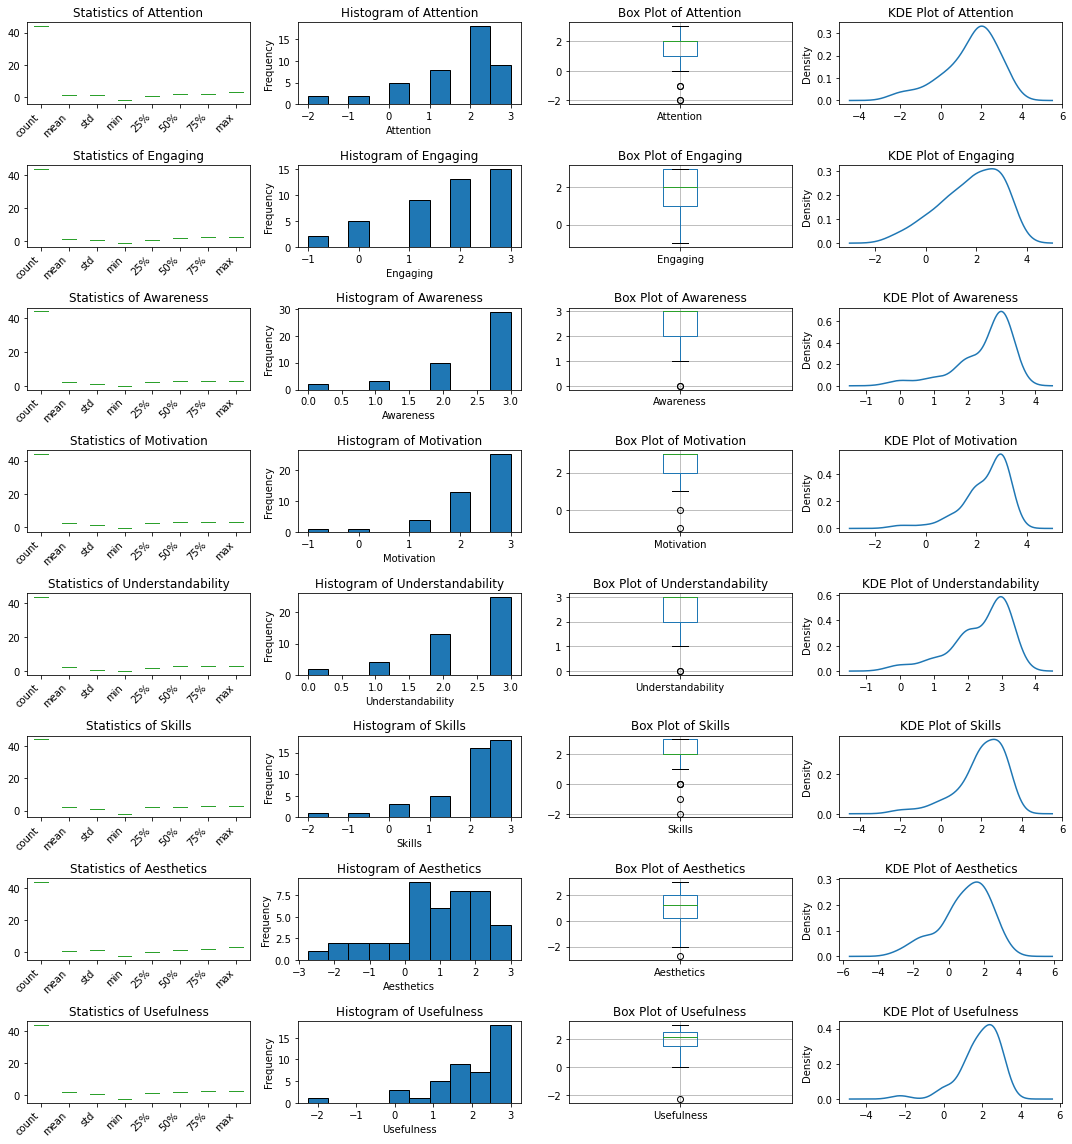

In [14]:
stats(new_norm_sto_df, 'Story')

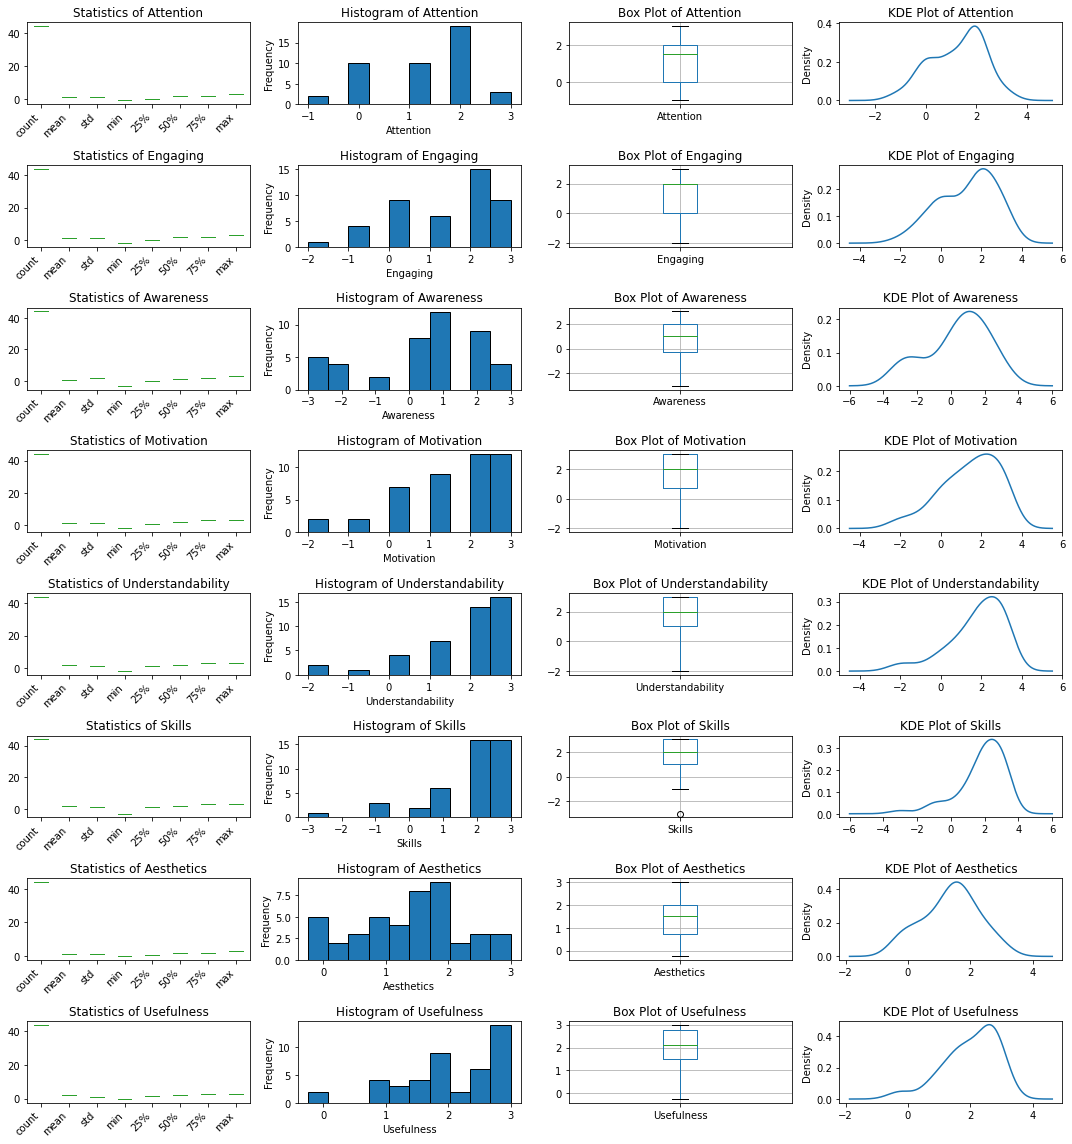

In [15]:
stats(new_norm_cus_df, 'Custom')

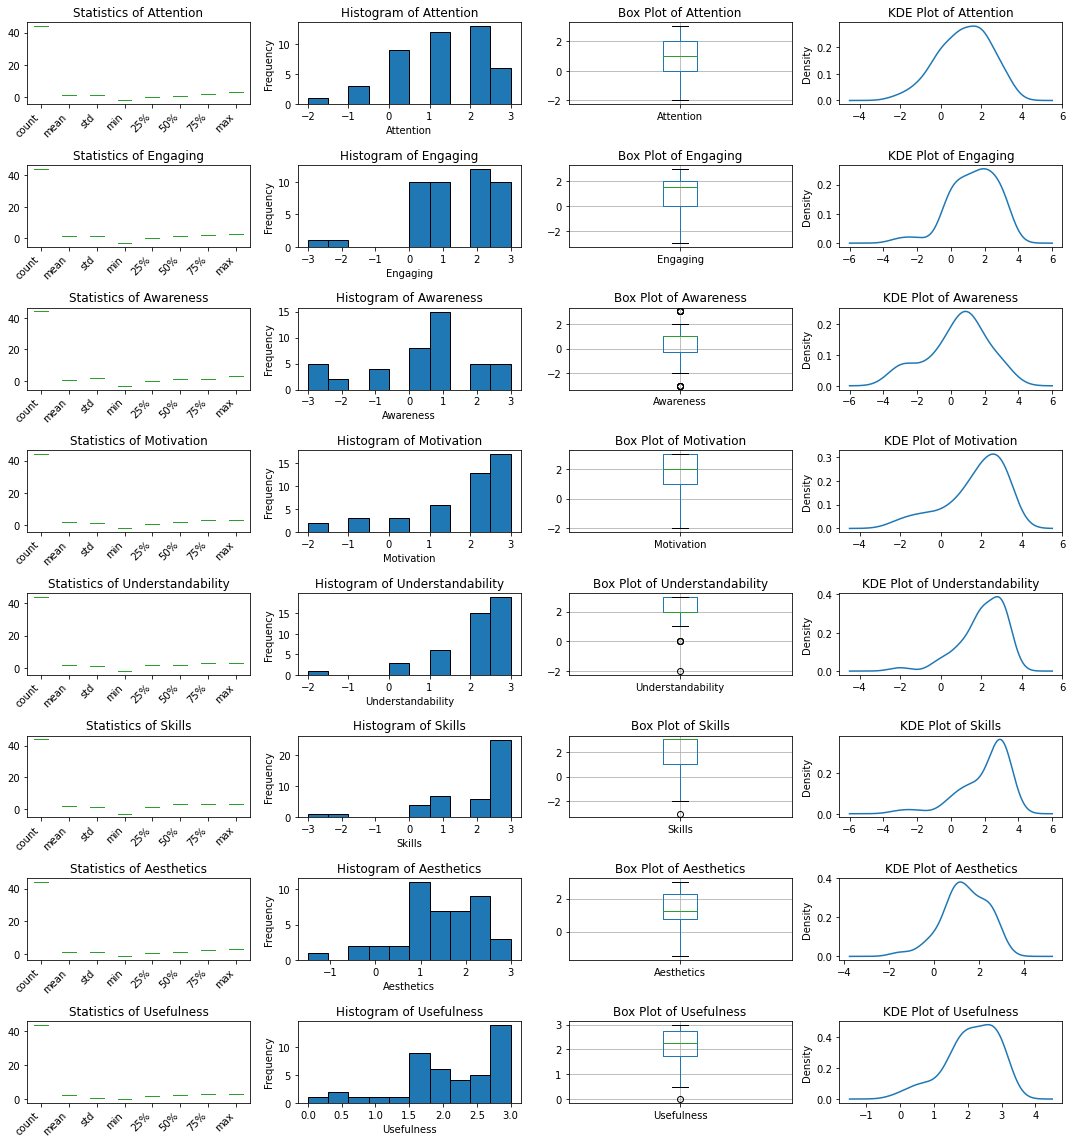

In [16]:
stats(new_norm_bas_df, 'Baseline')

In [17]:
sto_mean = pd.DataFrame(new_norm_sto_df.mean()).T
cus_mean = pd.DataFrame(new_norm_cus_df.mean()).T
bas_mean = pd.DataFrame(new_norm_bas_df.mean()).T

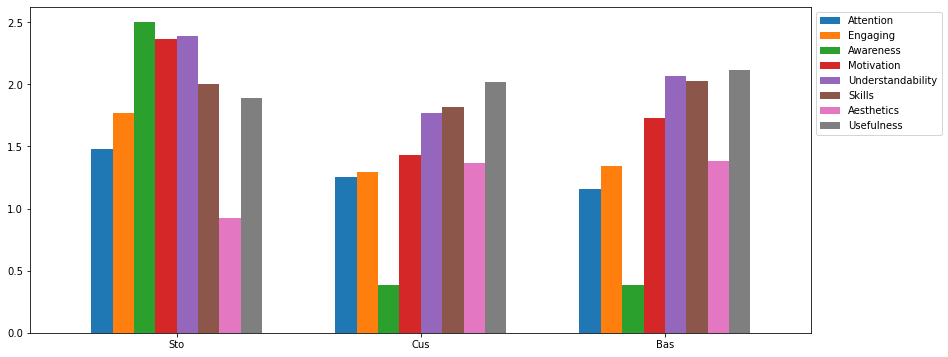

In [18]:
combined_df = pd.concat([sto_mean, cus_mean, bas_mean], ignore_index=True)
ax = combined_df.plot.bar(width=0.7, figsize=(14, 6))
_ = ax.set_xticklabels(dnames, rotation=0)
_ = ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
# _ = ax.annotate((y_value, "x_position" , "y_position"))

## Others

In [19]:
demo_pid = '10'
# design_order_series = survey_response_df[csq_pid].apply(lambda x: x.get('design_order'))
demo_response = survey_response_df[demo_pid]
demo_response_df = pd.DataFrame(demo_response.to_dict()).T
new_demo_columns = [get_qinfo(demo_pid, c.split('-')[0]) for c in demo_response_df.columns]
demo_response_df.columns = new_demo_columns
demo_response_df.to_excel('data/qualitative/demo.xlsx', index=False)
demo_csquest_response_df = pd.merge(csquest_qual_df, demo_response_df, left_index=True, right_index=True)
demo_csquest_response_df.to_excel('data/qualitative/csquest_demo.xlsx', index=False)

Text(0.5, 1.0, 'About how much time do you spend on computers each day?')

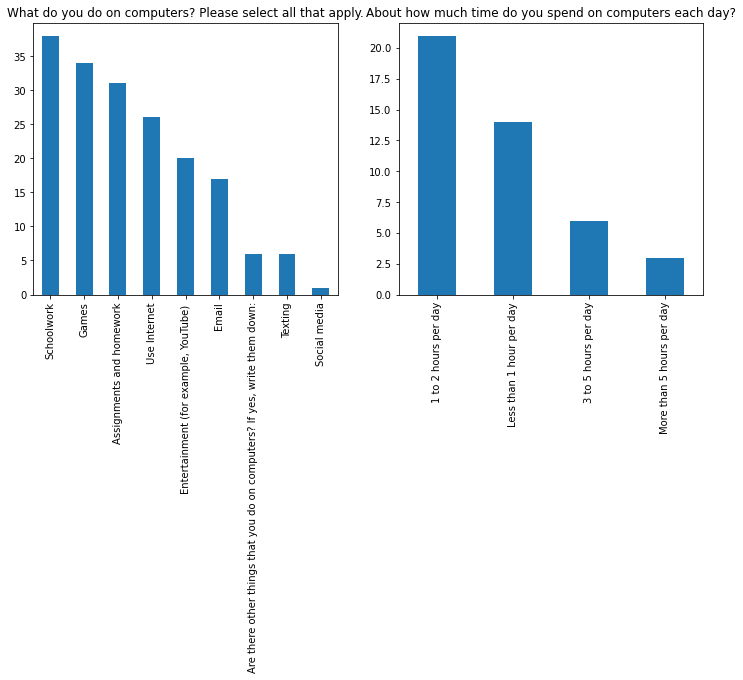

In [20]:
index_pid = '0'
index_response = survey_response_df[index_pid]
index_response_df = pd.DataFrame(index_response.to_dict()).T
new_index_columns = [get_qinfo(index_pid, c.split('-')[0]) for c in index_response_df.columns]
index_response_df.columns = new_index_columns
# display(index_response_df)
q1 = 'What do you do on computers? Please select all that apply.'
q2 = 'About how much time do you spend on computers each day?'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

index_response_df.explode(q1)[q1].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title(q1)

index_response_df.explode(q2)[q2].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title(q2)